<a href="https://colab.research.google.com/github/mscarlosnava/notebooks/blob/main/nanochatwebinar_BV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Vision Webinar on Nanochat**

# **Building High-Performance, Sovereign AI on a Micro-Budget**

**Nanochat - The best LLM that $100 can buy.**

In today's market, most businesses rely on Large Language Models (LLMs) for a variety of tasks. While powerful, these models are convoluted. They have trillions of tokens and billions of parameters, meaning your team operates without true visibility into the core mechanics. Relying on these layers of abstraction hinders a developer's ability to fully optimize or innovate at a fundamental level.

**Nanochat** is a complete blueprint for building a ChatGPT-like AI model, designed to be built, understood, and modified by a small team on low budget. You can start at ~$100!

It serves as a strategic accelerator that lowers the barrier to entry for enterprise AI. By using Nanochat, we turn the AI Black Box into a White Box, allowing your engineers to inspect, audit, and own every single part of the workflow.

### **Business Impacts: The ROI of Owned AI**
For business leaders, Nanochat is more than a coding exercise. It is a low-risk sandbox for validating an internal AI strategy without multi-million dollar capital expenditure.

* **Cost Control & Predictability:** Eliminate recurring API costs and avoid unpredictable price increases or vendor policy changes. Significantly reduce your cost per query over time while maintaining better control over latency and availability.
* **Data Privacy & Security:** Keep all customer data in-house. No third-party model providers handling sensitive information. Achieve complete data sovereignty through self-hosting or running in your own selected infrastructure.
* **Competitive Advantage:** Fine-tune on proprietary data including customer insights and domain-specific documents. Create a model that truly understands your unique business context rather than generic information.
* **Build Internal AI Capability:** Teams develop deep understanding of LLM mechanics, increasing future optionality and reducing dependency on external expertise.
* **Regulatory Preparedness:** Stay ahead of future regulatory and market shifts regarding data residency and AI governance by controlling the model instead of depending on external compliance.
* **Risk-Free Experimentation:** Use as a sandbox environment to train at smaller scale, test innovative ideas, and validate concepts before scaling to larger models.


To understand the pedigree of this architecture, we look to its creator, **Andrej Karpathy**.
* **Industry Leader:** A founding member of OpenAI and the former Director of AI at Tesla, where he led the computer vision team for Autopilot.
* **Educator:** Renowned for making complex AI concepts accessible (e.g., Stanford CS231n), he is now focused on democratizing access to high-level AI training through Eureka Labs.

---
We are going to perform a "speedrun." We will set up, train, and deploy a functioning LLM using the 'Nanochat architecture', demonstrating how accessible high-performance AI can be.

# **Setup**

We will clone the repository from GitHub:

In [ ]:
git clone https://github.com/karpathy/nanochat.git
cd nanochat

### **Installing Dependencies**
Before we build the model, we need a clean, efficient workspace. We are using a modern tool called `uv` (an extremely fast Python package manager) to handle our dependencies. We are creating a virtual environment to ensure our software doesn't conflict with other system tools.
The script speedrun.sh, is designed to just run right away on a blank box start to end.

Create a new virtual environment in .venv, get all the dependencies, and activate the environment:

In [ ]:
# 1. Install uv (if not already installed)
command -v uv &> /dev/null || curl -LsSf https://astral.sh/uv/install.sh | sh
# 2. Update your shell path immediately so it can find 'uv'
source $HOME/.local/bin/env
# 3. Create the .venv local virtual environment (if it doesn't exist)
[ -d ".venv" ] || uv venv
# 4. Install the repo dependencies
uv sync
# 5. Activate venv so python uses the project's environment
source .venv/bin/activate

# **The Tokenizer**

Computers don't understand words. They understand numbers. A **Tokenizer** breaks text down into smaller chunks called "tokens" (words or sub-parts of words). Before an AI (like ChatGPT) can read a sentence like "Hello World", that text must be converted into a format the computer can process.

A computer's brain (the neural network) is essentially a giant math machine. It cannot do math on the letter "H". It can only do math on numbers.
Tokenization is the translation bridge. It takes human text and converts it into a list of numbers called Tokens.

**Input**: "Hello World"

**Tokenizer**: Breaks it down and assigns numbers.

**Output**: [15496, 2159] (Hypothetical numbers representing "Hello" and "World").
How we choose to chop up this text (Tokenization) determines how smart or "dumb" the AI seems in specific areas.

What's easy to miss is, tokenization is not just a technical detail, it's a business lever.
It impacts:

*   Training cost (how many tokens you need to represent the same text)
*   Inference cost + latency (tokens processed per user request)
*   Model quality (how well the model can represent your domain terms)
*   Internationalization (how expensive / accurate it is across languages)
*   Safety + compliance (how reliably you can enforce special control tokens)













## **How do we chop up text?**
**1. Character-Level Tokenization (The "Too Small" Approach)**

Every single letter gets a number. a=1, b=2, c=3...

The problem is that the sequence of numbers becomes incredibly long. The sentence "I went to the store" becomes 19 numbers.

Why this hurts AI: AI models have a Context Window (a limit on how much text they can remember at once). If every letter takes up a slot in that memory, the AI forgets the beginning of the sentence before it finishes reading the end.

**2. Word-Level Tokenization (The "Too Big" Approach)**

Every unique word gets a number. Apple=1, Run=2, The=3...

The problem is that languages are infinite. What if the AI sees the word "OpenCV"? If that word wasn't in its original list, the AI crashes or sees "Unknown". You can't possibly list every word in existence.

**3. Sub-word Tokenization (The "Just Right" Approach - Used by GPT)**

This is the habitable zone. We break words into meaningful chunks.

Common words like `the` remain one chunk.
Complex words like `Tokenization` might be split into `Token` and `ization`.

It keeps the list of numbers short (good for memory) but allows the AI to understand any word by building it from smaller parts.


## **Why AI Makes Weird Mistakes**
Many things users think are "AI hallucination" or "stupidity" are actually just Tokenization glitches.

### **1. Why Early LLMs Couldn't Spell**

If you ask ChatGPT, "Spell the word 'Lollipop' backwards", it might fail.
To you, "Lollipop" is 8 letters. To the AI, "Lollipop" is just one single token (e.g., ID 9981).

The AI sees the token ID, but the "letters" are hidden inside that ID. It has to memorize the spelling rather than "seeing" it.
One analogy to describe it as “trying to count the threads in a rope without untwisting it first" the model sees a woven unit (token) rather than the individual strands (letters).

### **2. Why AI is Bad at Simple Math**
**Query:** 123 + 456.

Humans read numbers digit by digit. Tokenizers often chop numbers arbitrarily.
123 might be one token.
1234 might be two tokens: 12 and 34.
AI has to learn math differently for every possible way a number gets chopped up. It's like trying to learn addition where sometimes "10" is a single digit and sometimes it's two digits.

### **3. Why AI is Worse at Non-English Languages**

Tokenizers are trained mostly on English text. They learn to make English words efficient (1 word = 1 token). For languages like Korean or Japanese, the tokenizer doesn't recognize the words, so it chops them into tiny, meaningless pieces (bytes).

The Cost: A sentence in English might cost 10 tokens. The same sentence in Korean might cost 40 tokens. This means Korean users "fill up" the AI's memory 4x faster and pay more for API usage, solely because the tokenizer isn't optimized for them.

### **4. The "Solid Gold Magikarp" Bug**
There was a strange glitch where if you asked an AI to repeat the string "SolidGoldMagikarp", it would panic, hallucinate, or insult you.

This happened because the tokenizer was trained on Reddit data, where a user named "SolidGoldMagikarp" posted frequently. The tokenizer learned to make this name a single special token.
However, the AI Model (the brain) was trained on a different dataset that didn't have that user.

The Result: The AI had a button on its keyboard for "SolidGoldMagikarp" (the token), but its brain had never learned what that button meant. Pressing it caused "undefined behavior", essentially an AI brain glitch.

# **How the Tokenizer is Built**



Just like a keyboard has letters (A, B) and control keys (Enter, Esc), an AI needs special tokens to control the conversation flow.


```
SPECIAL_TOKENS = [
    "<|bos|>",              # Start of a new document (Like hitting "New File")
    "<|user_start|>",       # Marks where YOU start typing
    "<|user_end|>",         # Marks where YOU stop typing
    "<|assistant_start|>",  # Marks where the AI starts typing
    "<|assistant_end|>",    # Marks where the AI stops typing
    "<|python_start|>",     # AI wants to write code
    "<|python_end|>",       # AI finished writing code
    "<|output_start|>",     # The code's result (output) starts here
    "<|output_end|>",       # The code's result ends here
]
```



### **Unicode and UTF-8 (The Raw Material)**

Before we even get to tokens, we have text.

Unicode: A standard list where every character in human languages is assigned an integer (Code Point).

Example: h = 104, e = 101, 👋 = 128075.

UTF-8: A way to store these integers as Bytes (computer memory units).
Simple characters (a, b, c) take 1 byte.
Complex characters (Emojis, Korean symbols) take 3 or 4 bytes.


## **The Byte Pair Encoding Algorithm**
Imagine we have a stream of bytes representing our text: `aaabdaaabac`


In the beginning, our vocabulary (the list of tokens we know) is just the individual letters: `a b c d`

Current Token Count: 11 tokens (one for each letter in the string).

We look at the string `aaabdaaabac` and count which two letters appear side-by-side most often.

`aa`: Appears 4 times (aa, aa, aa, aa - aaab... actually in aaa you have aa twice overlapping, but usually, we count non-overlapping or just raw counts).

`ab`: Appears 2 times.

`bd`: Appears 1 time.

`da`: Appears 1 time.

`ac`: Appears 1 time.

Since `aa` is the winner, we decide to stop treating it as two separate things (a, a) and create a new token for it. Let's call this new token `Z`.

**Rule**: Every time we see `a` followed by `a`, we replace it with `Z`.

New Vocabulary Entry: `Z` = `aa`

**Updated string**: `ZabdZabac` (We replaced `aa` with `Z`)

**Current Token Count**: 9 tokens (We just compressed it!).

We keep doing this, finding the most common pair and merging it until we reach a limit we set (the Vocabulary Size).

## **Why not just have a GIANT vocabulary?**

If we made a token for every single number (like 123, 124) and every word variation (run, running, runs), wouldn't the model be smarter?

The answer is NO, for three simple reasons:

**1. Sparsity:** If 748,291 is its own unique token, the model might see it once in all of the internet. It never gets a chance to learn what that token means.


*   Small Vocab: The model sees the token 7, billions of times. It understands 7 perfectly.
*   Huge Vocab: The model sees the token 748291 once. It's just a random stranger. The model fails to generalize.


**2. Memory Explosion:** The model has a lookup table (Embedding Matrix) for every token.


*   50,000 tokens: The table is manageable (~200MB).
*   10 million tokens: The table becomes massive (~40GB+). The model spends all its memory just storing the dictionary, with no room left for the "brain" (layers) to do the thinking.


**3. Loss of Structure:** If apple and apples are two totally unique, unconnected IDs (like ID 50 and ID 9000), the model doesn't inherently know they are related. It has to re-learn the concept of plurality from scratch for every single word. By breaking them into apple + s, the model learns that adding s usually makes things plural, applying that rule to everything.

We are compiling a custom tokenizer written in **Rust**.
* **Why Rust?** It offers high performance and memory safety. By compiling our own, we gain speed advantages during the training process, though we remain compatible with OpenAI's standards for inference.


In [ ]:
# Install Rust / Cargo
curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh -s -- -y
source "$HOME/.cargo/env"
# Build the rustbpe Tokenizer
uv run maturin develop --release --manifest-path rustbpe/Cargo.toml

# **Why Data Matters**
We don't just "train AI." We promote it. We take a model through three distinct stages of education, using different types of data at each step to unlock specific business capabilities.

### **Stage 1: The Foundation (General Intelligence)**

**The Data:** FineWeb-EDU (11B Tokens).

**The Model's Capability:** It understands English grammar, basic logic, and world facts.

**Business Limitation:** It is smart but useless for specific tasks. It knows what a "Contract" is, but it doesn't know your company's risk tolerance.

### **Stage 2: Domain Adaptation (The Specialization)**

**The Data:** Raw Documents (Unstructured).

**The Model's Capability**: Domain Specialisation


The Data Input:


*   **Legal**: 500 Executed Contracts (PDFs).
*   **Manufacturing**: 200 OEM Manuals & Technical Specs.
*   **Finance**: 1,000 10-K Filings.

**The Transformation**: We feed this text into the model repeatedly. It stops predicting "The cat sat on the mat" and starts predicting "The turbine vibrating at 50Hz indicates..."

**Business Value**: The model stops hallucinating generic answers and starts speaking your dialect.

* Example: It learns that in Healthcare, "Pt" means "Patient," not "Point."
* Example: It learns that in Legal, "Indemnity" is a high-risk topic.

### **Stage 3: Instruction Tuning (The Job Training)**

**The Data:** Curated Training Pairs (Input → Output), where we convert docs into behaviour.

* **Healthcare**: Doctors spend a considerable amount of their time typing discharge notes. They need to summarize 2 weeks of hospitalization into a 1-page letter for the GP.
    * **The Solution**: Input the daily raw notes, output a perfectly formatted medical discharge summary.

* **Manufacturing**: A specific machine breaks down. The manual is 4,000 pages long, and the error code is cryptic (Err 404-B). Technicians spend hours searching for the fix.

  * **The Solution**: You type the error code, and it gives the exact page reference and a simplified summary of the fix.

* **Legal & Compliance**: Reviewing Non-Disclosure Agreements (NDAs) or Vendor Contracts takes hours. Lawyers keep missing non-standard clauses buried deep in the pages.
    * **The Solution**: An LLM that highlights risky clauses and suggests edits based on the company's Playbook.

* **Finance**: Analysts read 50 annual reports (10-Ks) to write one "Buy/Sell" thesis, which takes weeks.
    * **The Solution**: An engine that digests the 10-Ks and drafts the "Risk Factors" and "Growth Outlook" sections of the memo automatically.

**The Transformation**: The model learns how to act. It learns to pause, format, summarize, or critique rather than just babbling.

**Business Value:** Reliability. The model produces output that fits directly into your business process without needing a human to fix it.

# **Ingesting the Knowledge Base: FineWeb-EDU**

Most early LLMs were trained on essentially a raw dump of the entire internet. The problem is that the internet is full of slop: SEO spam, random code snippets, navigation menus, and low-quality forums.
To feed our model, we are accessing the **FineWeb-EDU 100B** dataset. This isn't just a dump of the internet, it is a re-packaged, shuffled collection of high-quality educational content designed for efficiency.



*   **The Source:** It starts with FineWeb (15 trillion tokens of scraped web pages).
*   **The Filter:** They didn't just use keywords. They used a smaller LLM (Llama-3-70B) to read and grade millions of web pages.
*   **The Criteria:** The model asked: "Is this page educational? Does it teach a concept logically?"

The result is a dataset that looks less like a random comment section and more like a massive, unorganized textbook.

### **The Architecture of the Data**
The dataset is split into **1,822 shards** (individual Parquet files). Each shard contains roughly 250,000 characters of text and is compressed to ~100MB. We use Parquet, an industry-standard columnar storage format, because it allows for extremely fast data loading during the training process, preventing the GPU from sitting idle while waiting for text.

### **Strategic Resource Allocation**
While there are 1,822 shards available, we are only downloading **240 of them** (approx. 24GB).

* **Why:** For a model of our size (20 layers, ~560M parameters), mathematical optimality suggests we need roughly **11 Billion tokens** of training data to reach its potential (Chinchilla Scaling Laws).

* **The Result:** 240 shards provide exactly that amount. Downloading more would waste compute time on diminishing returns, downloading fewer would leave the model under-baked.
#### **The Chinchilla Ratio**
We are training a **560 Million Parameter** model. According to the industry-standard **Chinchilla Scaling Laws**, purely increasing model size without enough data yields diminishing returns.
* **The Golden Ratio:** To reach optimal performance for this size, we require ~20 tokens of data per parameter.
* **The Calculation:** 560M parameters × 20 = **11.2 Billion tokens**.
* **The Schedule:** We divide this total into **21,400 training steps**, processing roughly half a million tokens every single step.

Let's initiate the download of this 24GB training corpus. On cloud infrastructure with high bandwidth, this will complete rapidly.

In [ ]:
python -m nanochat.dataset -n 240

All of this is by default going into ~/.cache/nanochat.


### **Training the Tokenizer**
Now we analyze our specific dataset to build the dictionary (vocabulary) the model will use.
* **Vocab Size:** 65,536 tokens.
* **Efficiency:** A larger vocabulary allows the model to compress information better (expressing more meaning in fewer numbers), which speeds up processing and reduces costs.


The training algorithm is identical to the one used by OpenAI (regex splitting, byte-level BPE). Right after, we can evaluate the tokenizer:

In [ ]:
python -m scripts.tok_train --max_chars=2000000000
python -m scripts.tok_eval

### **Benchmarking the Tokenizer**

Before training the brain, we check our translation efficiency. We compare our compression ratio against industry standards like GPT-2 and GPT-4.

* **Compression Ratio:** Nanochat is achieving ~4.8. This means roughly 5 characters of text are compressed into 1 token.
* **The Result:** Despite having a smaller total vocabulary than GPT-4, our specialized tokenizer performs exceptionally well on our target dataset. This highlights the value of **domain adaptation**, building tools specifically for your business data rather than using generic, off-the-shelf solutions.

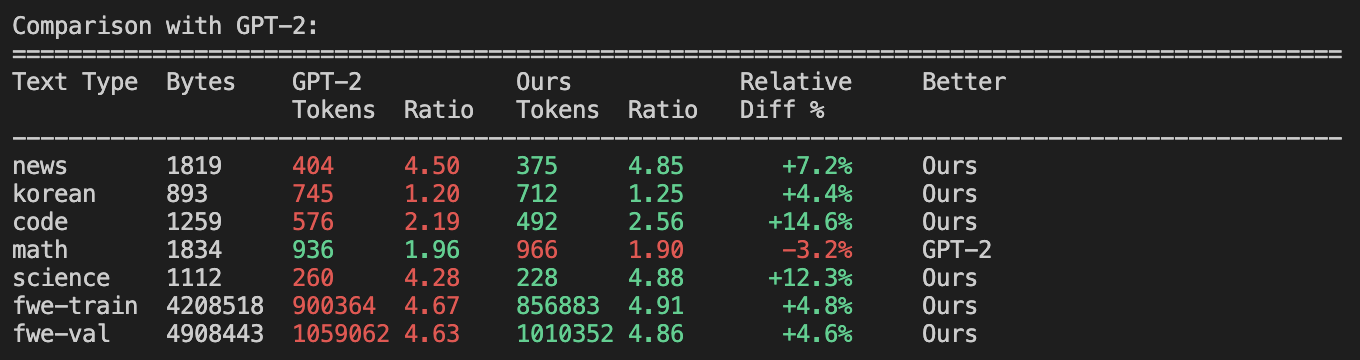
We're not doing so hot compared to GPT-4, but GPT-4 has a much larger vocab size (100,277). In particular, GPT-4 is a lot better in multilingual (FineWeb has a very strong focus on English, so that makes sense!), but also on code and math:

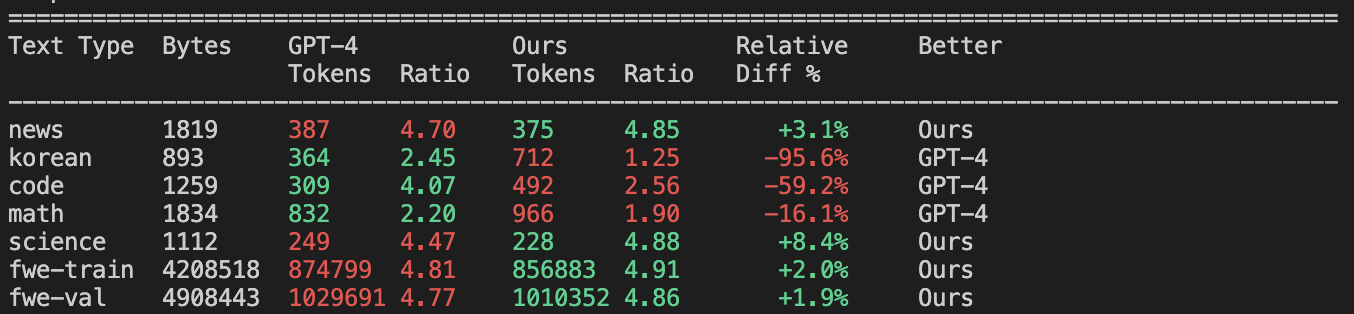

A bit more about computing environments that will run nanochat:


1.   The code will run just fine on the Ampere 8XA100 GPU node as well, but a bit slower.
2.   All code will run just fine on even a single GPU by omitting torchrun, and will produce ~identical results (code will automatically switch to gradient accumulation), but you'll have to wait 8 times longer.
1.   If your GPU(s) have less than 80GB, you'll have to tune some of the hyperparameters or you will OOM / run out of VRAM. Look for --device_batch_size in the scripts and reduce it until things fit. E.g. from 32 (default) to 16, 8, 4, 2, or even 1. Less than that you'll have to know a bit more what you're doing and get more creative.
2.   Most of the code is fairly vanilla PyTorch so it should run on anything that supports that - xpu, mps, or etc.




### **Hardware Flexibility**

A major advantage of the Nanochat architecture is its portability.
While we recommend GPUs (Graphics Processing Units) for the heavy lifting of training, the entire pipeline is capable of running on standard hardware.

* **CPU / MPS (MacBook):** The code automatically detects your hardware. If you are on a standard business laptop (like a MacBook Pro), it switches to "MPS" (Metal Performance Shaders) or standard CPU mode.
* **The Benefit:** This allows your developers to write, debug, and test the code locally (on a plane, at home) without burning cloud credits.

**The Micro-Model Strategy**
Without a GPU, you can train a small model.
* **The Tool:** A specialized script: `dev/runcpu.sh`.
* **What it does:** It automatically shrinks the model's dimensions and shortens the training cycle.
* **The Use Case:** This is perfect for **CI/CD pipelines** (automated software testing). You can verify that the *entire* AI factory works, from data loading to chatting, in minutes on a cheap server, ensuring everything is perfect before you pay for the expensive H100 GPUs for the real run.

### **Conclusion**

**Recap:**

In this session, we did not just *use* an AI, we **built** one.

1.  **From Scratch:** We started with empty files and raw internet text.
2.  **The Brain (Pre-training):** We taught it to understand English and World History for ~$100.
3.  **The Personality (Midtraining):** We taught it to be a helpful, polite assistant in minutes.
4.  **The Logic (RL):** We coached it to solve math problems without hallucinating.

**The "So What?" for Your Business**

The Nanochat architecture proves that **Sovereign AI** is no longer a multi-million dollar fantasy. It is an accessible engineering reality.

* **Move from Renting to Owning:** You now have a blueprint to build models that live on your servers, keep your data private, and speak your specific industry language.
* **The White Box:** We have traded the Black Box of APIs for a White Box we fully understand. If the model makes a mistake, we don't just hope for a vendor update, we open the hood and fix the code.
